![alt text](https://)

#  Data Science and AI
## Lab 7.2: Random Forests

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419
    - **ROC AUC**  = 0.6150
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first stp is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Heart Disease
Heart disease is one of the main causes of death worldwide, so this is a good start to use data science for good.

To learn how to prevent heart disease is necessary to know how to reliably detect it first.

There is a dataset from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.

Data is courtesy of **Yeh, I-Cheng** via the **UCI Machine Learning** repository:
- Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008, doi:10.1016/j.eswa.2008.07.018.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

- Will a person donate next time?
- Is a first time donor likely to donate bload again?
- Is a donor likely to donate again after a long period without making any donations?
- How much blood is someone going to donate?

## Potential Questions
- Will a person donate next time?

## Actual Question
- Has a person donate in March 2017?

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

%matplotlib inline

sns.set()
import warnings
warnings.filterwarnings('ignore')


In [4]:
file = '../DATA/transfusion_data.csv'
transfusion = pd.read_csv(file)

In [5]:
transfusion.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [6]:
transfusion.dtypes
transfusion.columns = ['Recency', 'Frequency', 'Monetary', 'Time','Donated']

In [7]:
transfusion.describe()

,Recency,Frequency,Monetary,Time,Donated
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [8]:
transfusion.isnull().sum()

Recency      0
Frequency    0
Monetary     0
Time         0
Donated      0
dtype: int64

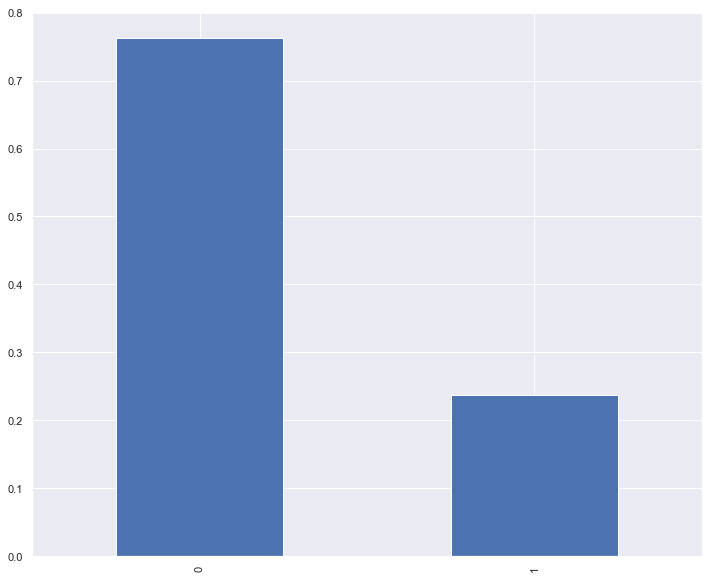

In [9]:
transfusion['Donated'].value_counts(normalize=True).plot(kind='bar',figsize=(12,10));

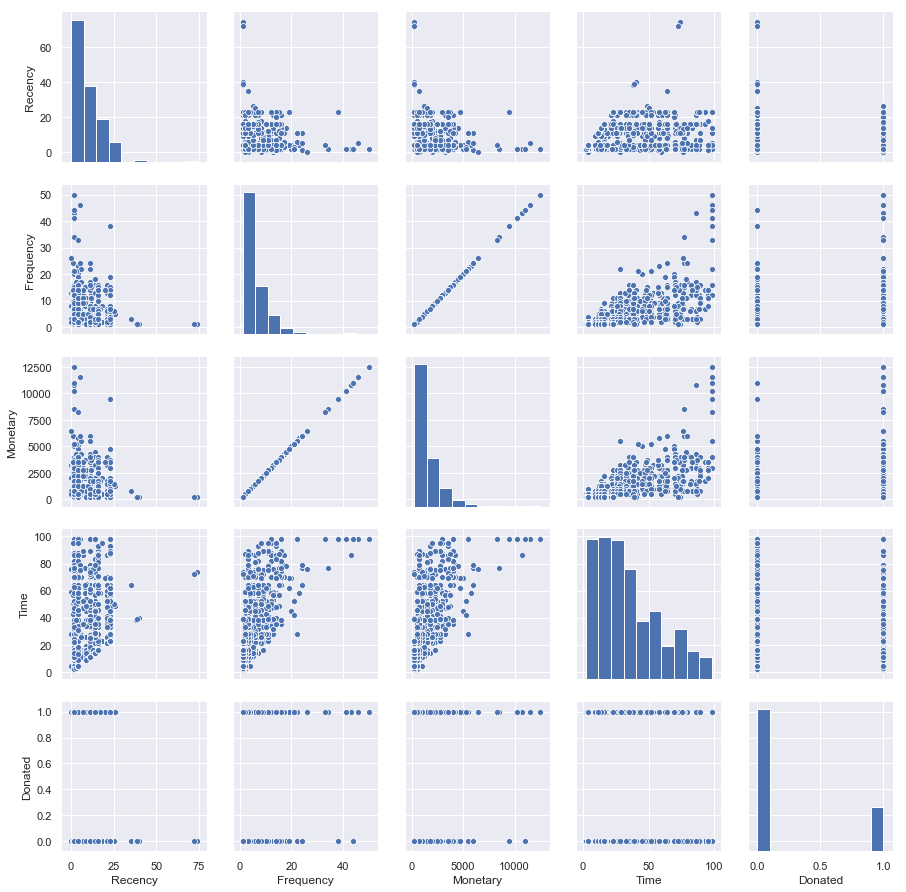

In [10]:
sns.pairplot(transfusion);

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [11]:
features = ['Recency', 'Frequency', 'Monetary', 'Time']
outcome = 'Donated'

X = transfusion[features]
# Convert the Donated column to a string
y = transfusion[outcome].astype(str)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

- The input variables are `Recency`, `Frequency`, `Monetary`, `Time'.
- The output variable is `Donated`
- The output variable is a classification on `yes` or `no`
- The modelling is **Supervised, Binary classification**

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Step 9: Fit the Model

In [14]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [15]:
def train_predict_model(features, target):
    
    clf = RandomForestClassifier()
    
    clf.fit(features, target)
    
    return clf, clf.predict(features)
    
clf, pred = train_predict_model(X_train, y_train)

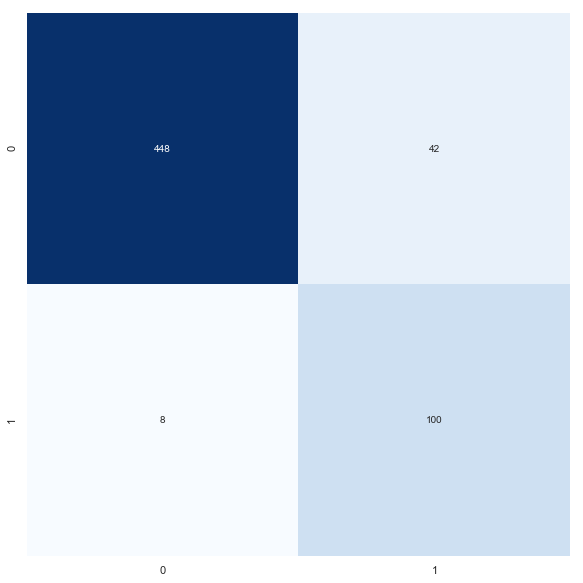

In [16]:

def plot_confusion(actual, predicted):
    mat = confusion_matrix(actual, predicted)

    # Confusion Matrix
    plt.figure(figsize=(12,10))
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues')

plot_confusion(y_train, pred)

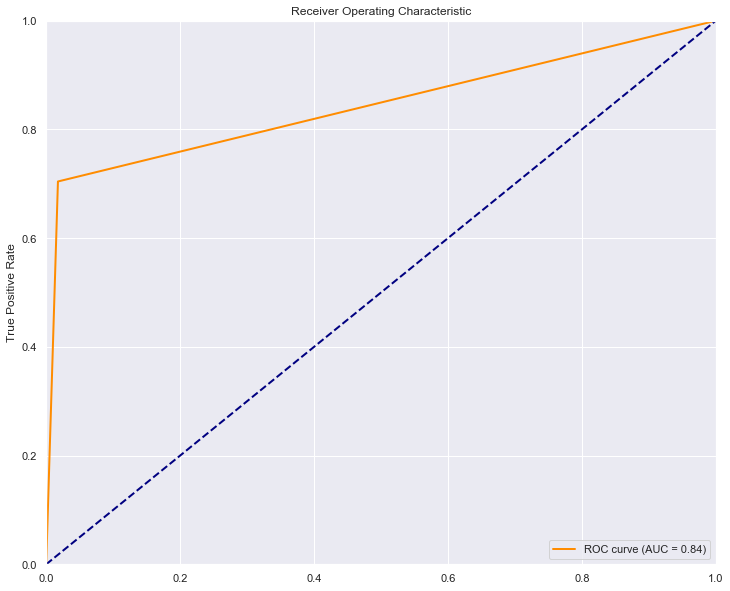

In [17]:

def plot_roc_curve(actual, predicted):
    actual = actual.astype(int)
    predicted = predicted.astype(int)

    precision, recall, _ = precision_recall_curve(actual, predicted)
    average_precision = average_precision_score(actual, predicted)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, predicted)
    roc_auc = auc(fpr, tpr)

    # ROC
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc = 'lower right');
    
plot_roc_curve(y_train, pred)

In [18]:
def best_forest_model(features, target):
    
    n_estimators = [5,9,15,21,31,51,99]
    max_depth = [3,5,7,9, 10, 20, 30, 50]
    min_samples_split = [2,3,4,5]
    max_features  = [0.25,0.5,0.75,1]
    
    best_score = 0
    
    for n in n_estimators:
        for depth in max_depth:
            for split in min_samples_split:
                for feature in max_features:

                    clf = RandomForestClassifier(n_estimators=n,
                                                 max_depth=depth,
                                                 min_samples_split=split,
                                                 max_features=feature,
                                                 random_state=42)

                    clf.fit(features, target)

                    score = clf.score(features, target)

                    if score > best_score:
                        model = RandomForestClassifier(max_depth=depth,min_samples_split=split,max_features=feature)

                    
    model.fit(features, target)
    
    return model, model.predict(features)

In [19]:
best_model, pred = best_forest_model(X_train, y_train)
best_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

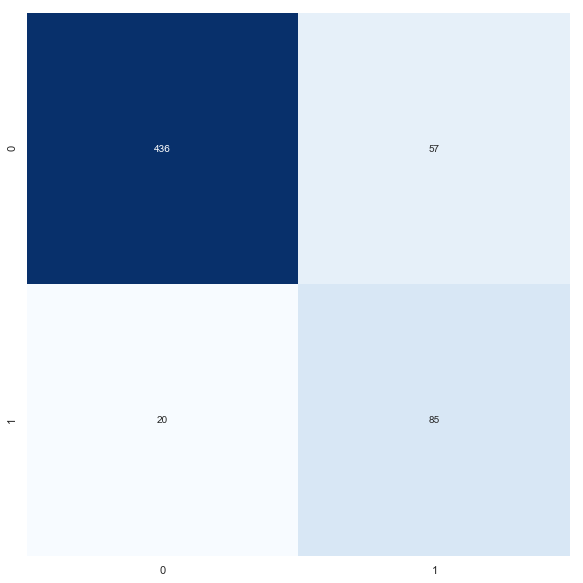

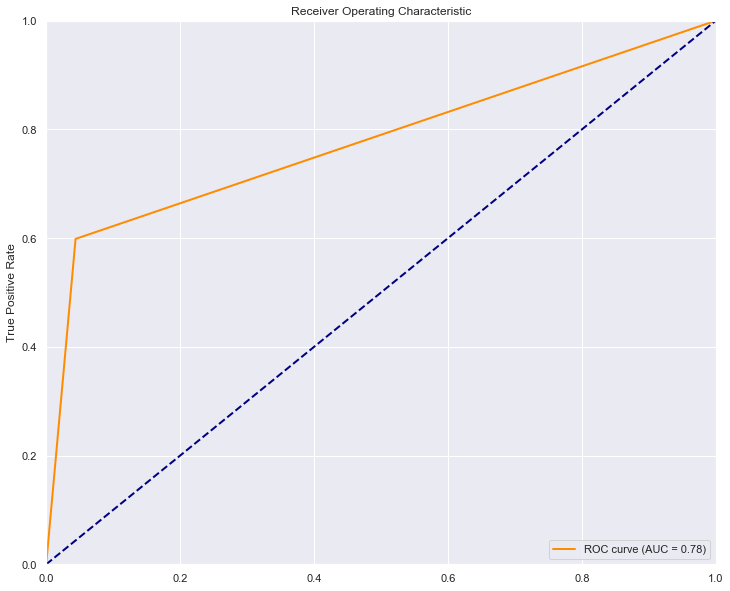

In [20]:
best_model, pred = best_forest_model(X_train, y_train)

plot_confusion(y_train, pred)

plot_roc_curve(y_train, pred)

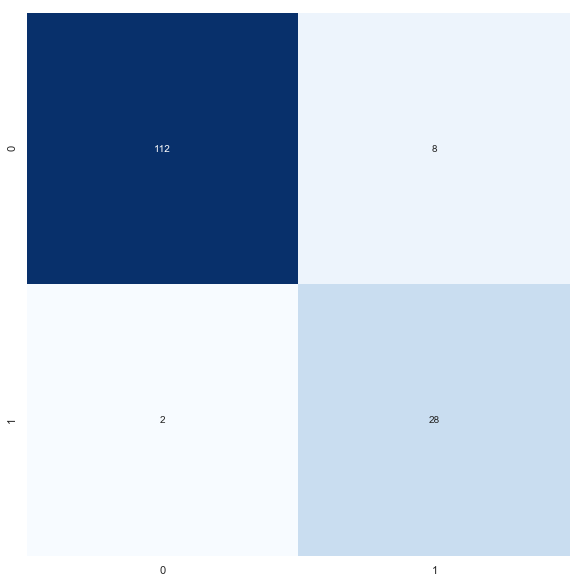

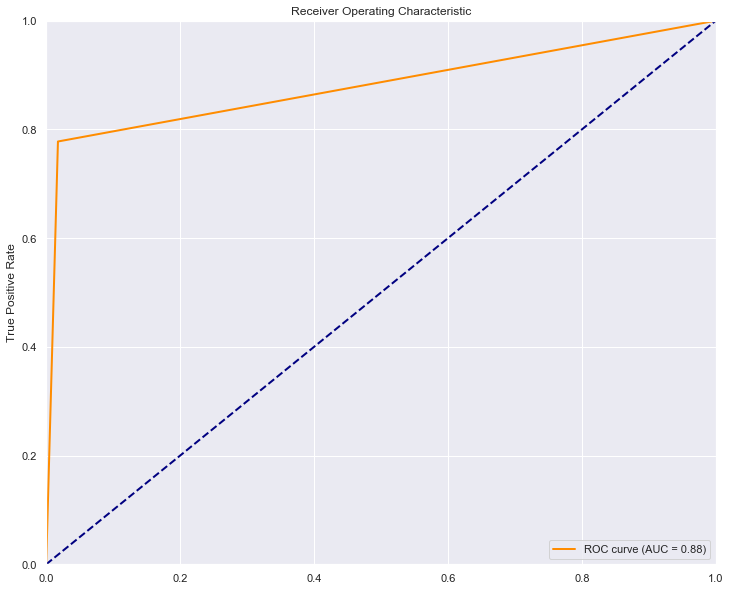

In [21]:
# Default model
model, pred = train_predict_model(X_test, y_test)

plot_confusion(y_test, pred)

plot_roc_curve(y_test, pred)


# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

>

>

>



---



---



> > > > > > > > > © 2019 Data Science Institute of Australia


---



---



